In [2]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

 import warnings
 warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/insurance.csv')
data.shape

(1338, 7)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
# mapping the gender and smoker columns
data['sex'] = data['sex'].map({'male':1,'female':0})
data['smoker'] = data['smoker'].map({'no':0,'yes':1})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [7]:
data.corr(numeric_only = True)['charges'].sort_values()

,charges
sex,0.057292
children,0.067998
bmi,0.198341
age,0.299008
smoker,0.787251
charges,1.000000


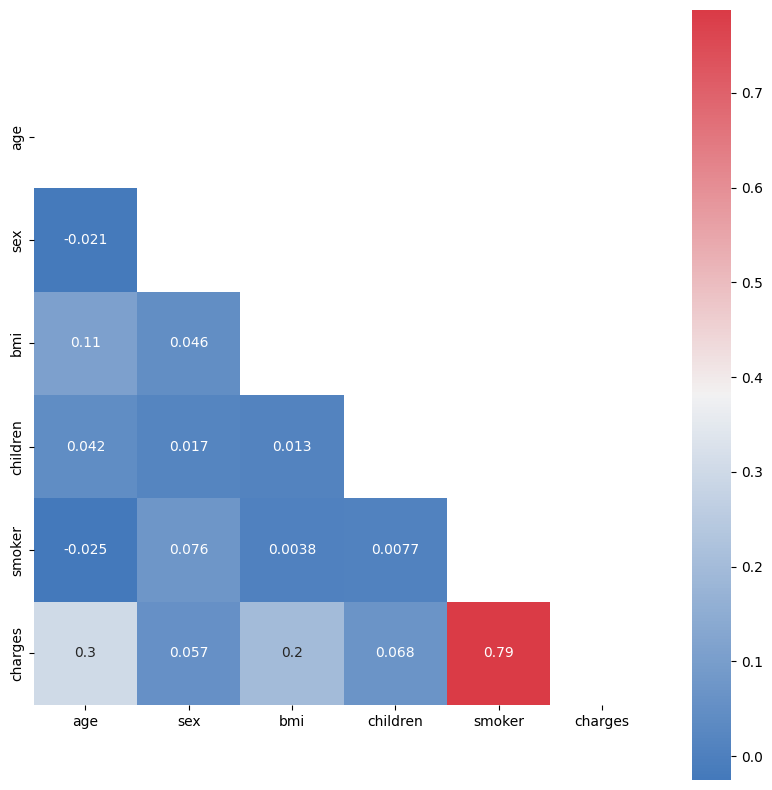

In [8]:
f, ax = plt.subplots(figsize = (10,10))
corr = data.corr(numeric_only = True)
sns.heatmap(corr,mask = np.triu(data.corr(numeric_only = True)),
            annot = True, cmap = sns.diverging_palette(250, 10,as_cmap = True),
            square = True, ax = ax)
plt.show()

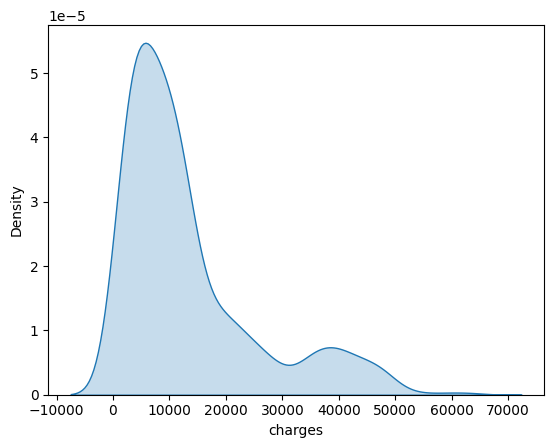

In [9]:
sns.kdeplot(data['charges'],fill = True)
plt.show()

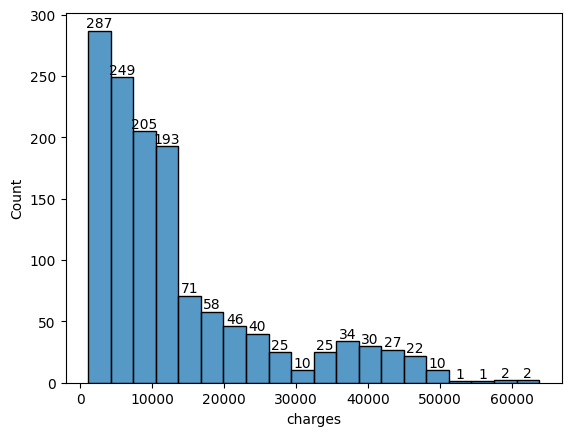

In [10]:
ax = sns.histplot(data['charges'],bins = 20)
ax.bar_label(ax.containers[0])
plt.show()

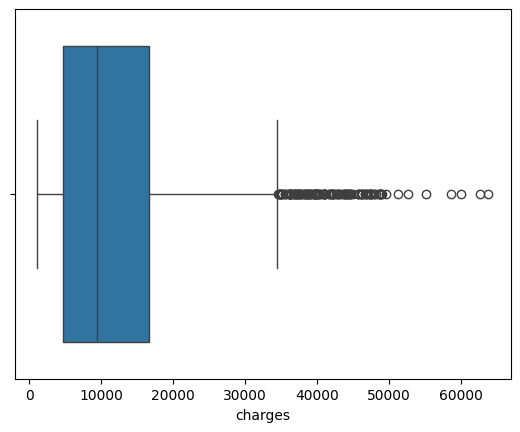

In [11]:
sns.boxplot(data['charges'],orient = 'h')
plt.show()

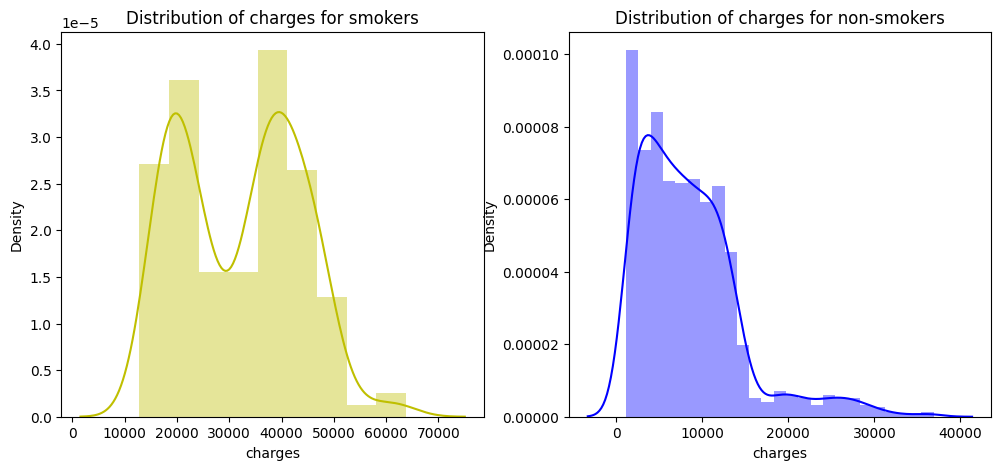

In [12]:
f = plt.figure(figsize  = (12,5))
ax = f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]['charges'],color = 'y',ax = ax)
ax.set_title('Distribution of charges for smokers')

ax = f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color = 'b',ax = ax)
ax.set_title('Distribution of charges for non-smokers')
plt.show()

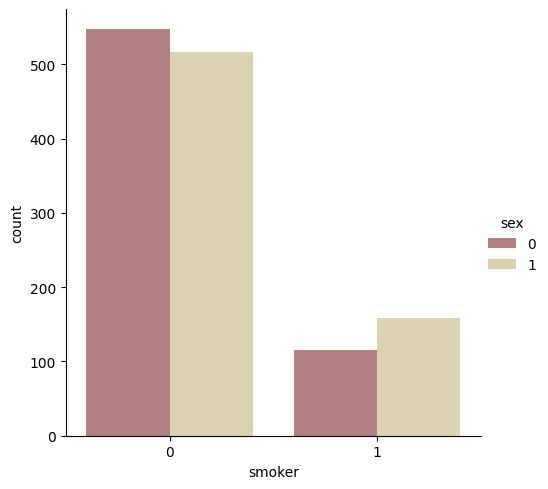

In [13]:
sns.catplot(x = 'smoker', kind  = 'count', hue = 'sex', palette = 'pink',data = data)
plt.show()

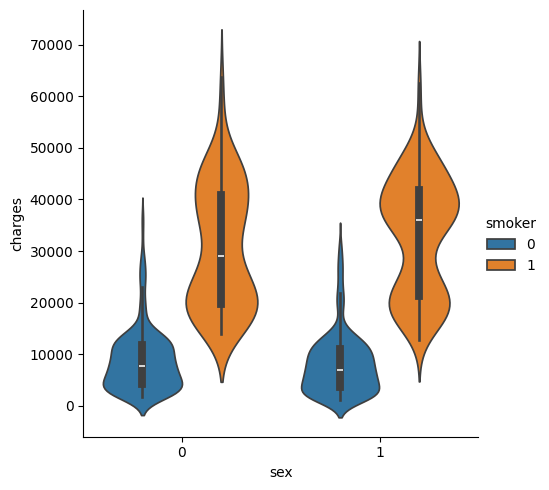

In [14]:
sns.catplot(x = 'sex', kind = 'violin', y = 'charges',hue = 'smoker',data = data)
plt.show()

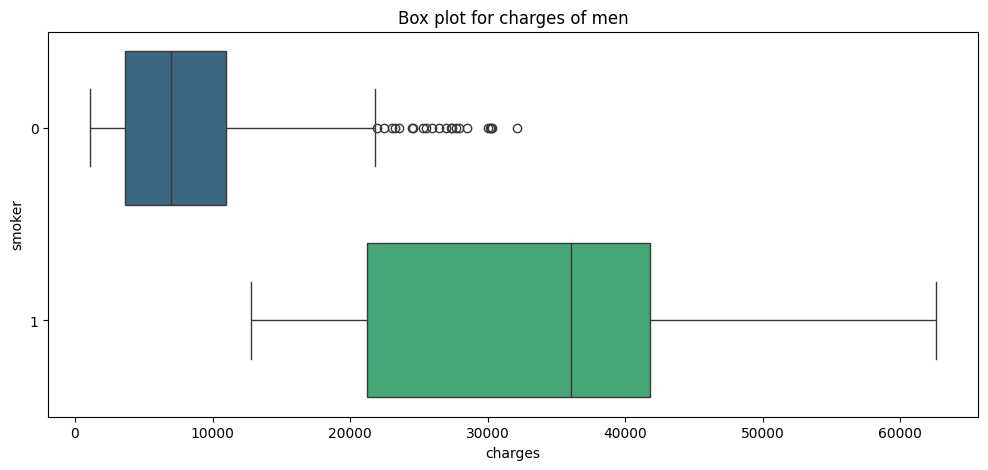

In [15]:
plt.figure(figsize = (12,5))
plt.title('Box plot for charges of men')
sns.boxplot(y = 'smoker', x = 'charges', data = data[(data.sex == 1)], orient = 'h', palette = 'viridis')
plt.show()

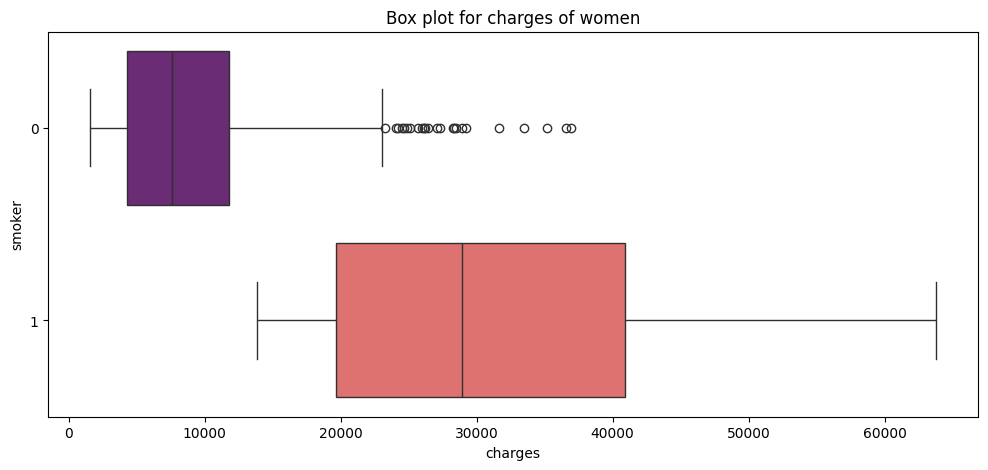

In [16]:
plt.figure(figsize = (12,5))
plt.title('Box plot for charges of women')
sns.boxplot(y = 'smoker', x = 'charges', data = data[(data.sex == 0)], orient = 'h',palette = 'magma')
plt.show()

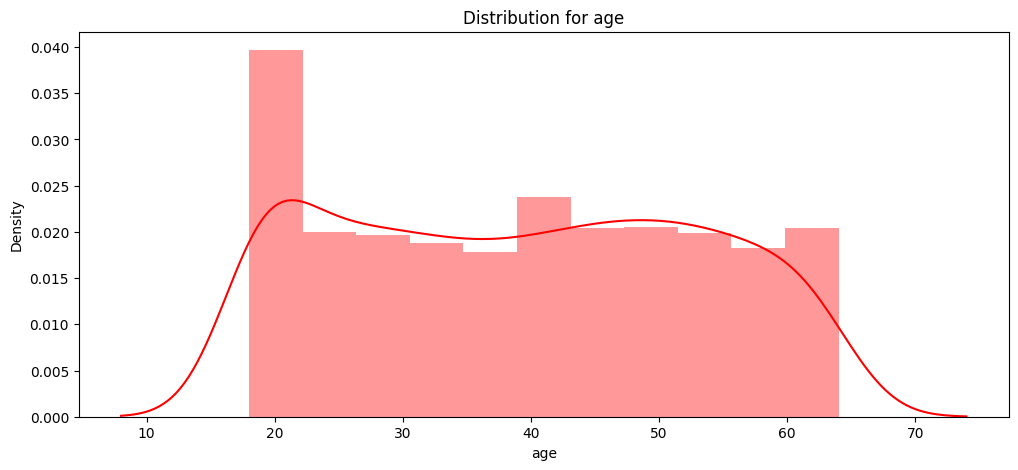

In [17]:
plt.figure(figsize = (12,5))
plt.title('Distribution for age')
sns.distplot(data['age'], color = 'r')
plt.show()

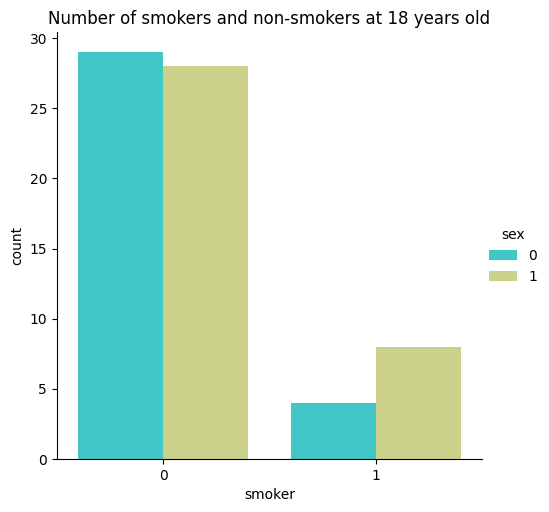

In [18]:
sns.catplot(x = 'smoker', kind = 'count', hue = 'sex', palette = 'rainbow', data = data[(data.age == 18)])
plt.title('Number of smokers and non-smokers at 18 years old')
plt.show()

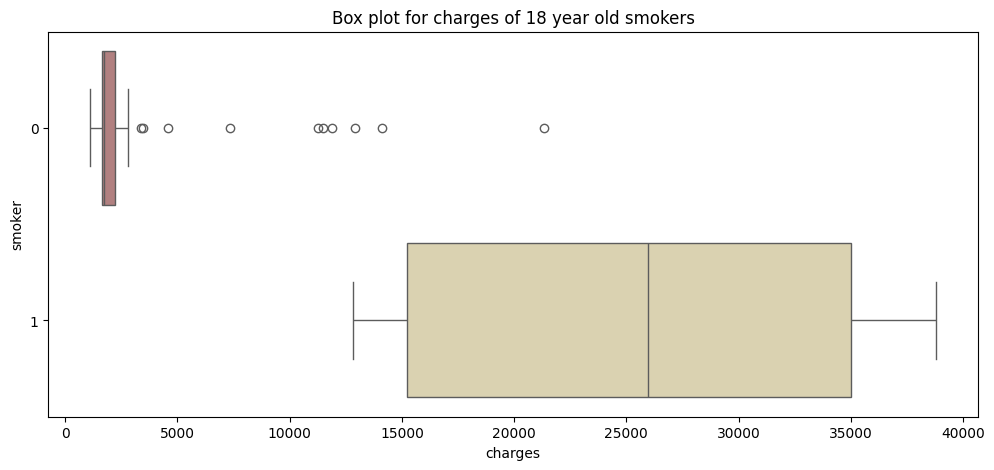

In [19]:
plt.figure(figsize = (12,5))
plt.title('Box plot for charges of 18 year old smokers')
sns.boxplot(y = 'smoker', x = 'charges', data = data[(data.age ==18)],orient = 'h',palette = 'pink')
plt.show()

**WE can see a huge jump in insurance premium charges if the client is an 18 year old smoker**

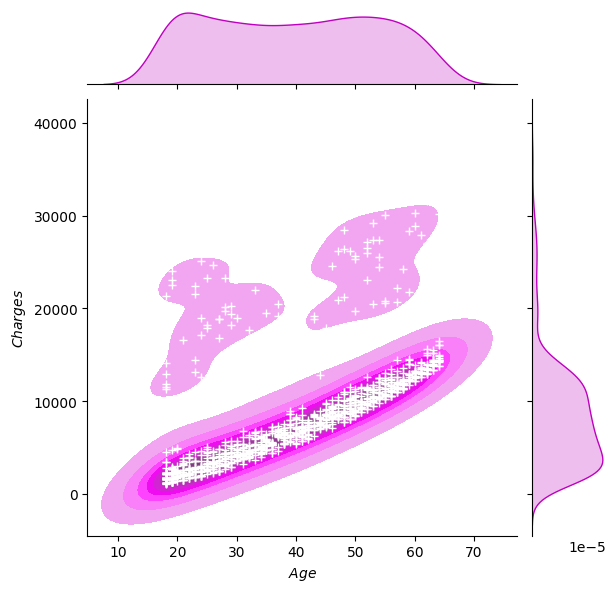

In [20]:
g = sns.jointplot(x = 'age', y= 'charges', data = data[(data['smoker'] ==0)],kind = "kde", color = 'm', fill = True )
g.plot_joint(plt.scatter, c = 'w', s = 30, linewidth = 1, marker = '+')
g.ax_joint.collections[0].set_alpha(1)
g.set_axis_labels('$Age$', '$Charges$')
ax.set_title('Distribution of charges and age of non-smoker')
plt.show()

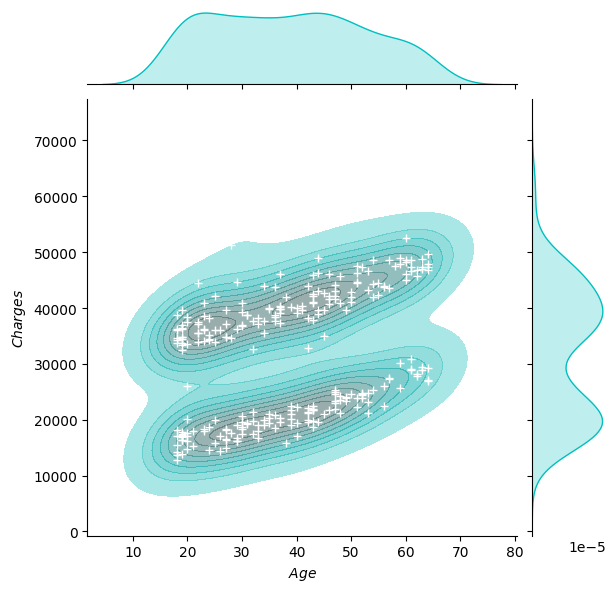

In [21]:
g = sns.jointplot(x = 'age', y= 'charges', data = data[(data['smoker'] ==1)],kind = "kde", color = 'c', fill = True )
g.plot_joint(plt.scatter, c = 'w', s = 30, linewidth = 1, marker = '+')
g.ax_joint.collections[0].set_alpha(0.5)
g.set_axis_labels('$Age$', '$Charges$')
ax.set_title('Distribution of charges and age of non-smoker')
plt.show()

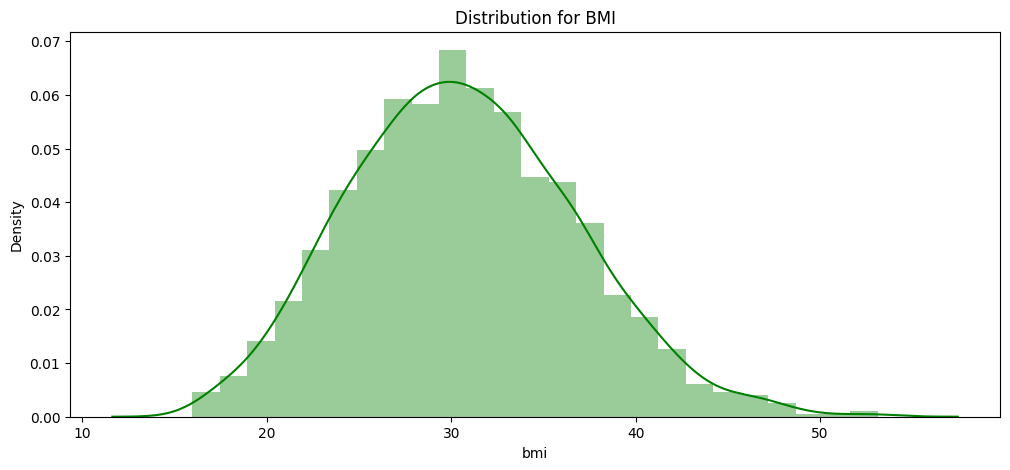

In [22]:
plt.figure(figsize = (12,5))
plt.title('Distribution for BMI')
sns.distplot(data['bmi'], color = 'g')
plt.show()


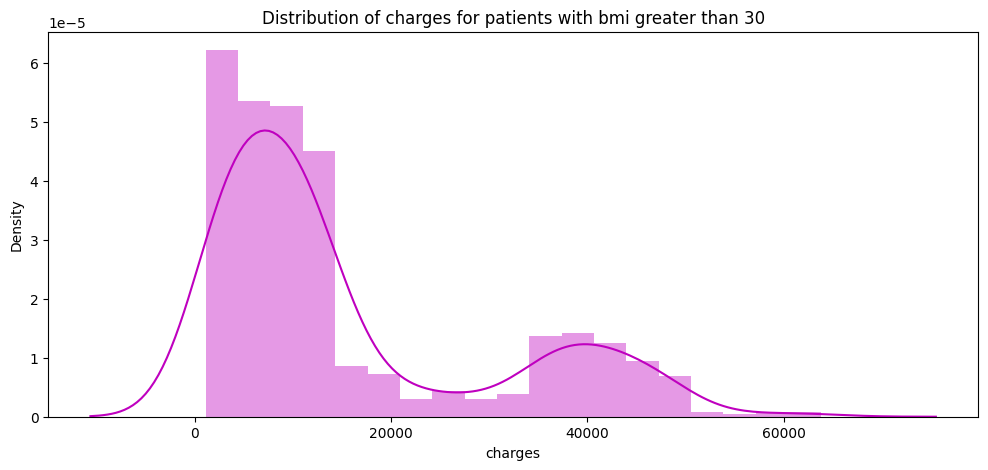

In [23]:
plt.figure(figsize = (12,5))
plt.title('Distribution of charges for patients with bmi greater than 30')
sns.distplot(data[(data.bmi >= 30)]['charges'],color = 'm')
plt.show()


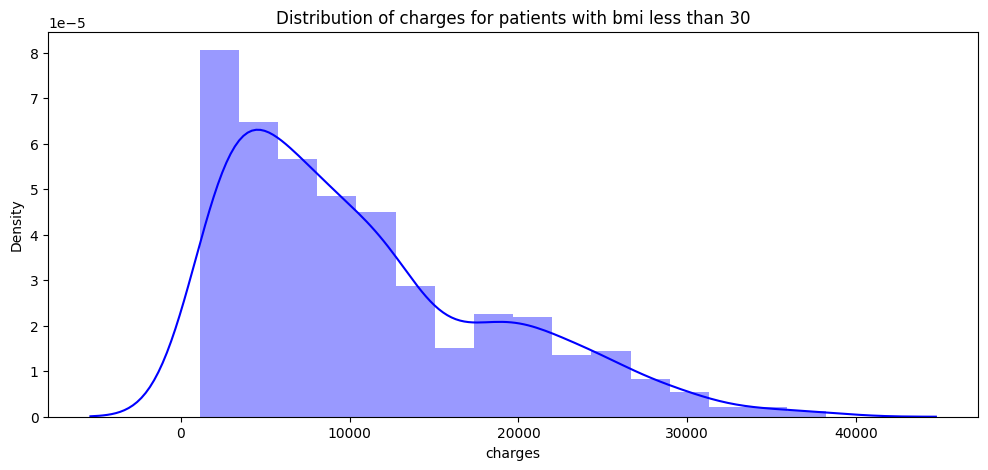

In [24]:
plt.figure(figsize = (12,5))
plt.title('Distribution of charges for patients with bmi less than 30')
sns.distplot(data[(data.bmi < 30)]['charges'],color = 'b')
plt.show()


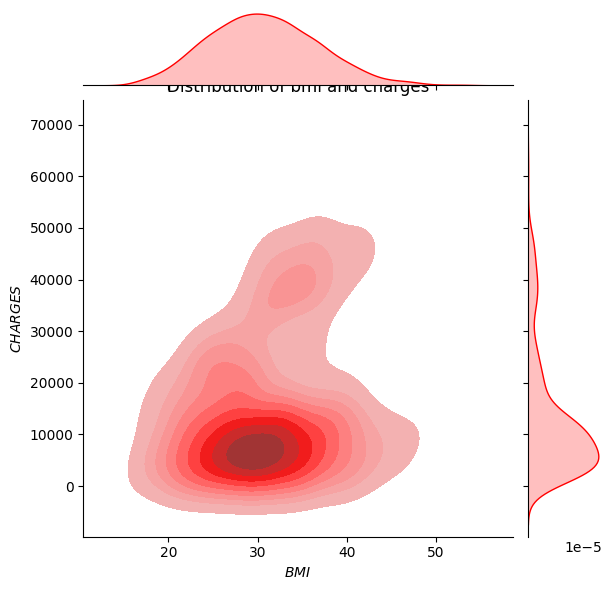

In [25]:
g  = sns.jointplot(x = 'bmi', y = 'charges', data = data, kind = 'kde', color = 'r',fill = True)
g.set_axis_labels('$BMI$', '$CHARGES$')
plt.title('Distribution of bmi and charges')
plt.show()

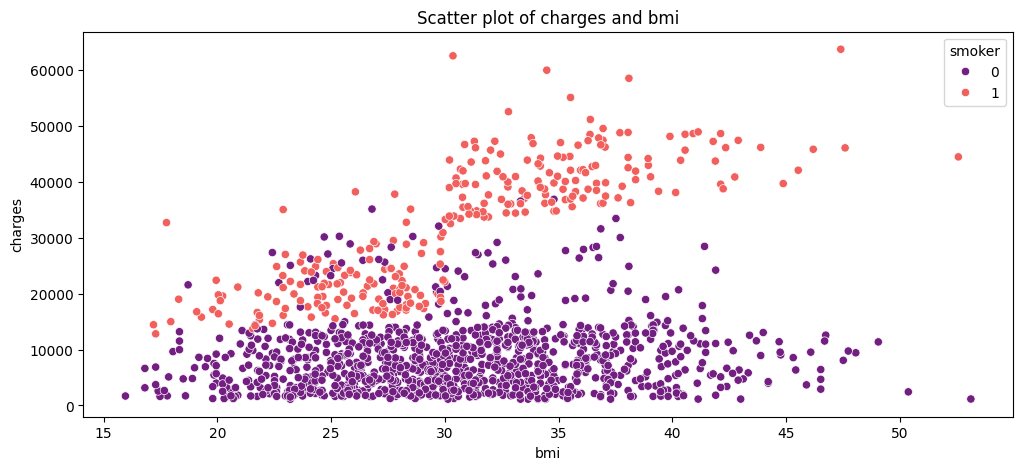

In [26]:
plt.figure(figsize = (12,5))
sns.scatterplot(x = 'bmi', y = 'charges', data = data, palette = 'magma', hue = 'smoker')
plt.title('Scatter plot of charges and bmi')
plt.show()

<Figure size 1000x600 with 0 Axes>

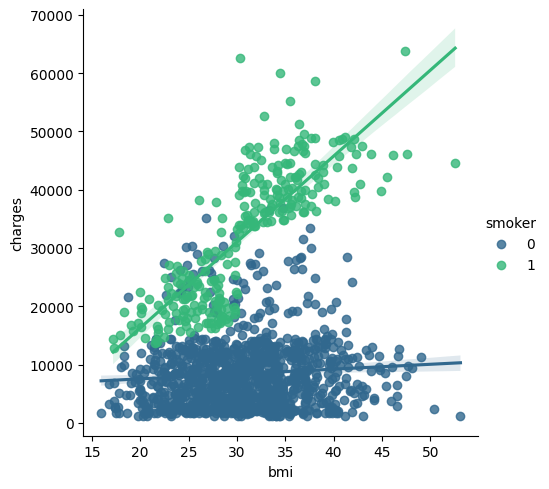

In [27]:
plt.figure(figsize = (10,6))
sns.lmplot(x = 'bmi', y = 'charges', hue = 'smoker', data = data, palette = 'viridis')
plt.show()

In [28]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


## Linear ML model


In [29]:
x = data.drop(['charges', 'region'], axis = 1)
y = data['charges']

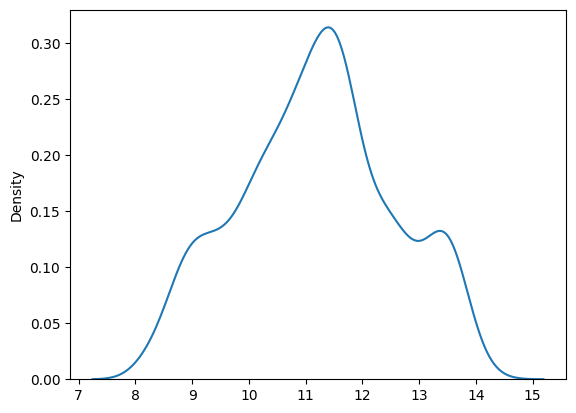

In [32]:
# since the charges column is a right skewed distribution we will apply boxcox transformation
from scipy.stats import boxcox
y['charges_boxcox'], lmbda = boxcox(y)

# distribution of target after transformation
sns.kdeplot(y['charges_boxcox'])
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y['charges_boxcox'],test_size = 0.2, random_state = 42)

In [35]:
# simple linear regression
import statsmodels.api as sm

x_train_data = sm.add_constant(x_train)
mlr_model = sm.OLS(y_train, x_train_data).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     663.3
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          4.94e-324
Time:                        12:55:29   Log-Likelihood:                -1085.6
No. Observations:                1070   AIC:                             2183.
Df Residuals:                    1064   BIC:                             2213.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1211      0.118     68.706      0.0

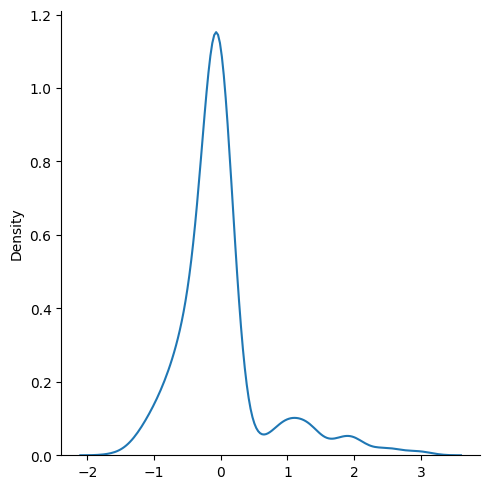

In [38]:
# residual
y_pred = mlr_model.predict(x_train_data)
res = y_train - y_pred

# residual plot
sns.displot(res, kind = 'kde')
plt.show()

In [39]:
# test prediction
# adding the constant
x_test_data = sm.add_constant(x_test)

# prediction
y_test_pred = mlr_model.predict(x_test_data)

In [40]:
# testing accuracy
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_test_pred))

0.8009882517855218


In [41]:
# sklearn linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.score(x_train,y_train))
print(lin_reg.coef_)

0.7571092573282975
[ 0.05011649 -0.10171341  0.01799317  0.1331588   2.33598598]


## Ridge Regression


In [42]:
from sklearn.linear_model import Ridge  #L2 reguralization
ridge_model = Ridge(alpha = 0.5)
ridge_model.fit(x_train, y_train)
print(ridge_model.score(x_train, y_train))

0.7571052466229484


## Lasso Regression

In [43]:
from sklearn.linear_model import Lasso  #L1 regularization
lasso_model = Lasso(alpha = 0.001, fit_intercept = True, precompute = False, max_iter = 1000,
                    tol  = 0.0001, warm_start = False, positive = False, random_state = 42, selection = 'cyclic')
lasso_model.fit(x_train, y_train)
print(lasso_model.score(x_train, y_train))

0.7571029220255494


## Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor as rfr
rfr_model = rfr(n_estimators = 100, criterion = 'squared_error', random_state = 42, n_jobs = -1, )
rfr_model.fit(x_train, y_train)
x_train_pred = rfr_model.predict(x_train)
x_test_pred = rfr_model.predict(x_test)

print('Training score: ', r2_score(y_train, x_train_pred))
print('Testing score: ', r2_score(y_test, x_test_pred))

Training score:  0.9647944756173699
Testing score:  0.8373983673678004


In [45]:
# feature importance
importances = rfr_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr_model.estimators_],axis = 0)
indices = np.argsort(importances)[::-1]
variables = ['age','sex','bmi','children','smoker','region']
importance_list = []
for f in range(x.shape[1]):
  variable = variables[indices[f]]
  importance_list.append(variable)
  print('%d.%s(%f)'%(f +1, variable, importances[indices[f]]))

1.smoker(0.450261)
2.age(0.368589)
3.bmi(0.127807)
4.children(0.041542)
5.sex(0.011801)


## Polynomial Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures
x_pol = x.drop(['sex','children'],axis = 1)
y_pol = y['charges_boxcox']
pol = PolynomialFeatures(degree = 2)
xpol = pol.fit_transform(x_pol)
x_train, x_test, y_train, y_test = train_test_split(xpol, y_pol, test_size = 0.2, random_state = 42)
pol_reg = LinearRegression()
pol_reg.fit(x_train, y_train)
y_train_pred = pol_reg.predict(x_train)
y_test_pred = pol_reg.predict(x_test)
print(pol_reg.intercept_)
print(pol_reg.coef_)
print('Training score: ',round(r2_score(y_train,y_train_pred)*100,2),'%')
print('Testing score: ',round(r2_score(y_test,y_test_pred)*100,2),'%')

6.481384598056027
[ 0.00000000e+00  1.05623125e-01  7.16920788e-02  8.66114539e-01
 -5.63502351e-04 -1.91315657e-05 -4.68404519e-02 -1.11968218e-03
  7.85564492e-02  8.66114539e-01]
Training score:  80.23 %
Testing score:  83.37 %
